In [1]:
import os ,sys
import numpy as np
import random as r
import cv2
workpath = sys.path[0]
#print (workpath)

import matplotlib.pyplot as plt

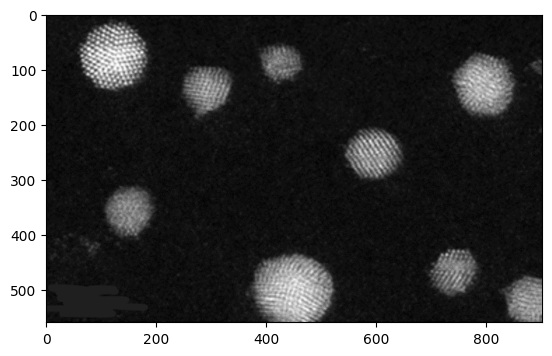

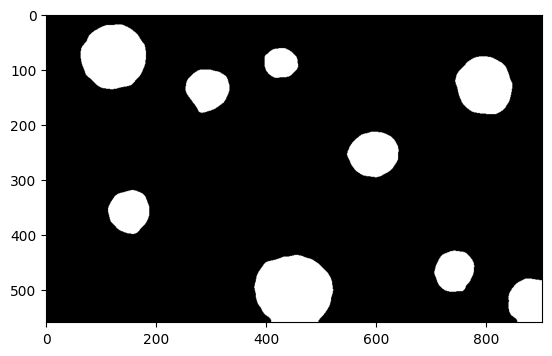

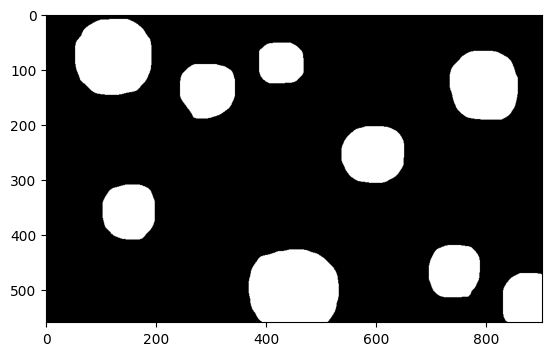

In [2]:
img = cv2.imread(f'{workpath}\\NP32.png',0)
plt.figure()
plt.imshow(img,cmap='gray')

def dilation_kernel(val : int , kernel_size : tuple):
    x , y = kernel_size
    kernel = np.ones( kernel_size , np.uint8)
    for i in range(x):
        for j in range(y):
            kernel[i,j] = kernel[i,j]*val
    return kernel

img_mask = cv2.fastNlMeansDenoising(img , h=10 , templateWindowSize=7 , searchWindowSize=21)
img_mask = cv2.GaussianBlur(img_mask , (21,21),sigmaX=5)
img_mask = cv2.threshold(img_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.figure()
plt.imshow(img_mask,cmap='gray')

img_mask = cv2.dilate(img_mask,kernel=dilation_kernel(255,(5,5)),iterations=5)

plt.figure()
plt.imshow(img_mask,cmap='gray')


